In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from marl.utils import tb_utils
from marl_experiments.roshambo import roshambo_bot

2022-11-19 13:47:06.241371: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mxsmith/.conda/envs/model38/lib


In [2]:
accuracies = []

for i, bot in enumerate(roshambo_bot.ROSHAMBO_BOT_NAMES):
    path = f"/scratch/wellman_root/wellman1/mxsmith/results/marl/roshambo/bc_ps/wid_{i}/"
    df = tb_utils.events_to_dataframe(path)
    accuracies.append(float(list(df["accuracy/greedy"])[-1]))
    break


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

bars = ax.bar(np.arange(len(accuracies)), accuracies, color="#457B9D")
ax.bar_label(bars, fmt="%.0f")

ax.set_xticks(np.arange(len(roshambo_bot.ROSHAMBO_BOT_NAMES)), labels=roshambo_bot.ROSHAMBO_BOT_NAMES, rotation=90)

ax.get_yaxis().set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.tick_params(axis="both", length=0)

ax.set_xlim(-1, 43)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

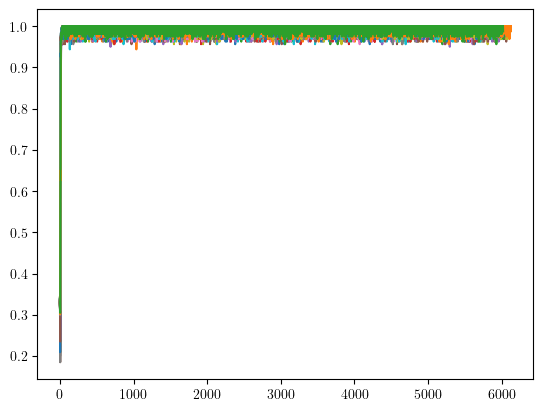

In [15]:
for i in range(43):
    path = f"/scratch/wellman_root/wellman1/mxsmith/results/marl/roshambo/bc_ps/wid_{i}/"
    df = tb_utils.events_to_dataframe(path)

    ys = np.stack(df["accuracy/greedy"])
    plt.plot(ys)
plt.show()
